<a href="https://colab.research.google.com/github/paubereon/CLASE_CORAZON/blob/main/Cuaderno_10_K_Nearest_Neighbors_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red">Cuaderno 10. K-Nearest Neighbors (KNN): Descripción y Explicación
## <font color="red">10.1 Descripción del Algoritmo

K-Nearest Neighbors (KNN) es un algoritmo de clasificación supervisada que asigna etiquetas a un punto de datos desconocido basándose en las etiquetas de sus "vecinos más cercanos". Este algoritmo es muy sencillo de entender y utilizar. En lugar de aprender un modelo explícito, KNN memoriza el conjunto de entrenamiento completo y realiza predicciones basándose en una comparación directa de la proximidad entre los puntos de prueba y los puntos de entrenamiento.

El algoritmo KNN se basa en la distancia entre los puntos. Generalmente, se usa la distancia euclidiana para medir esta proximidad, pero se pueden usar otras métricas, como la distancia Manhattan o la distancia de Minkowski. En la imagen el punto P1, se compara la distancia de los puntos de la clase Azul, con la clase Verde y la Clase Roja, y en el ejemplo P1 se compara con K=7 puntos cercanos y la distancia ded todos esos punto que sea la mas cercana no da que el pPunto P1, puede pertenecer a la clase Verde, en el hecho que los más cercanos estén allí.

![imagen](https://github.com/adiacla/bigdata/blob/master/knn.jpg?raw=true)

## <font color="red">10.2 Ventajas y Desventajas
### Ventajas:
* Simplicidad: Es fácil de entender e implementar.
* No paramétrico: No requiere suposiciones sobre la distribución de los datos, lo que lo hace adecuado para problemas donde no se conocen las distribuciones.
* Eficaz para problemas de clasificación pequeños o moderados: Funciona bien cuando hay un conjunto de datos pequeño y bien distribuido.

### Desventajas:
* Alto costo computacional: A medida que crece el tamaño del conjunto de datos, el tiempo de predicción aumenta, ya que debe calcularse la distancia entre el punto de prueba y todos los puntos de entrenamiento.
* Dependencia de la elección de K: El rendimiento del modelo depende de la elección de "K" (el número de vecinos). Un valor muy bajo puede resultar en sobreajuste, mientras que un valor muy alto puede llevar a un modelo subajustado.
* Sensibilidad a los valores atípicos: Los valores atípicos pueden afectar negativamente las predicciones si no se manejan adecuadamente.


---


## <font color="red">10.3 Matemáticas del Algoritmo KNN
El principio básico de KNN es muy simple. Para predecir la etiqueta de un punto de prueba, se realiza lo siguiente:

* Calcular la distancia: Para cada punto de prueba, calculamos la distancia entre él y todos los puntos de entrenamiento. La fórmula más común para calcular la distancia es la distancia euclidiana, que para dos puntos $p = (x_1, x_2, ..., x_n)$ y $q = (y_1, y_2, ..., y_n)$ en un espacio de $n$-dimensiones es:

$d(p, q) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$

![imagen](https://github.com/adiacla/bigdata/blob/master/euclediana.png?raw=true)

* Seleccionar los k vecinos más cercanos: Se elige un valor de k, que es el número de vecinos más cercanos a considerar para la clasificación.
* Votación por mayoría: Finalmente, la clase del punto de prueba P1 se asigna según la votación mayoritaria de las clases de los k vecinos más cercanos.


---


---

## <font color="red">10.4 Ejercicio de Clasificación con KNN
En este ejercicio, vamos a trabajar con un conjunto de datos de pacientes para predecir la presencia de problemas cardíacos utilizando dos características: edad y colesterol. El objetivo es aplicar el modelo K-Nearest Neighbors (KNN), un algoritmo de clasificación supervisada, para resolver este problema. Además, realizaremos una evaluación adecuada del modelo, optimizaremos el valor de k y compararemos el rendimiento del modelo en diferentes configuraciones.

### Pasos a seguir:
* Exploración y Análisis Exploratorio de Datos (EDA): Inspeccionamos los datos para entender su estructura, identificar valores faltantes y realizar un análisis preliminar.
* Imputación de Valores Faltantes: Dado que el conjunto de datos contiene valores nulos en las columnas de características, necesitamos imputarlos.
* Preprocesamiento de Datos: Incluye la numerización de variables categóricas (si las hay), la normalización de los datos y la división en conjuntos de entrenamiento y prueba.
* Entrenamiento del Modelo KNN: Entrenamos el modelo K-Nearest Neighbors con diferentes valores de k para determinar cuál da el mejor rendimiento.
* Ajuste de Hiperparámetros (Selección de k): Realizamos la selección del mejor valor de k utilizando técnicas de validación cruzada o búsqueda en cuadrícula.
* Evaluación del Modelo: Evaluamos el rendimiento del modelo utilizando métricas como la precisión (accuracy), la matriz de confusión, la curva ROC y el AUC.
* Persistencia del Modelo: Guardamos el modelo entrenado para su uso futuro.
* Predicciones con Nuevos Datos: Realizamos predicciones con datos no vistos previamente.

A continuación, se detalla cada paso con código y explicaciones.

### 1. Cargar y explorar el conjunto de datos (EDA)
El primer paso es cargar el conjunto de datos desde una fuente y revisar la estructura del mismo.


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Crear el conjunto de datos
data = {
    "Horas de Estudio": [
        "Alta", "Baja", "Baja", "Alta", "Alta",
        "Media", "Media", "Alta", "Baja", "Media",
        "Alta", "Baja", "Baja", "Media", "Alta",
        "Media", "Alta", "Baja", "Media", "Baja"
    ],
    "Asistencia": [
        "Buena", "Buena", "Mala", "Mala", "Buena",
        "Buena", "Mala", "Buena", "Mala", "Buena",
        "Mala", "Buena", "Mala", "Buena", "Buena",
        "Mala", "Mala", "Buena", "Buena", "Mala"
    ],
    "Resultado": [
        "Sí", "No", "No", "Sí", "Sí",
        "No", "Sí", "Sí", "No", "Sí",
        "No", "No", "Sí", "No", "Sí",
        "No", "Sí", "No", "Sí", "No"
    ]
}


df = pd.DataFrame(data)

df

,Horas de Estudio,Asistencia,Resultado
0,Alta,Buena,Sí
1,Baja,Buena,No
2,Baja,Mala,No
3,Alta,Mala,Sí
4,Alta,Buena,Sí
5,Media,Buena,No
6,Media,Mala,Sí
7,Alta,Buena,Sí
8,Baja,Mala,No
9,Media,Buena,Sí


In [ ]:
# Codificar variables categóricas a numéricas
encoder = LabelEncoder()
df_encoded = df.apply(encoder.fit_transform)

# Separar características y etiqueta
X = df_encoded[["Horas de Estudio", "Asistencia"]]
y = df_encoded["Resultado"]

X


,Horas de Estudio,Asistencia
0,0,0
1,1,0
2,1,1
3,0,1
4,0,0
5,2,0
6,2,1
7,0,0
8,1,1
9,2,0


In [ ]:
# Ver la equivalencia de las categorías originales a los valores numéricos
print("\nEquivalencia de categorías originales:")
for column in df.columns:
    print(f"{column}: {dict(zip(encoder.classes_, range(len(encoder.classes_))))}")


Equivalencia de categorías originales:
Horas de Estudio: {'No': 0, 'Sí': 1}
Asistencia: {'No': 0, 'Sí': 1}
Resultado: {'No': 0, 'Sí': 1}


In [ ]:
# Dividir en conjunto de entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
X_test

,Horas de Estudio,Asistencia
13,2,0
8,1,1
4,0,0
12,1,1


In [ ]:
X_train

,Horas de Estudio,Asistencia
19,1,1
11,1,0
0,0,0
7,0,0
3,0,1
6,2,1
16,0,1
1,1,0
17,1,0
18,2,0


In [ ]:
# Entrenar el modelo KNN con K=3
#Este valor de K fue arbitrario por el ejercicio
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Hacer predicciones
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 1, 0])

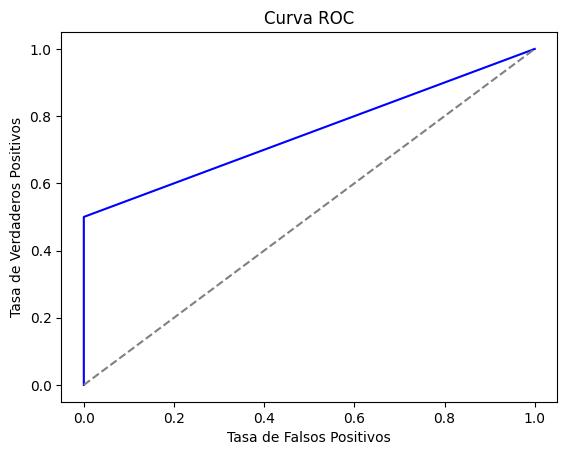

Precisión del modelo: 0.75
Matriz de confusión:
 [[2 0]
 [1 1]]
Área bajo la curva ROC: 0.75


In [ ]:
# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Manejar el cálculo de ROC AUC solo si ambas clases están presentes
if len(set(y_test)) > 1:
    roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
    fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, color='blue')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title('Curva ROC')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.show()
else:
    roc_auc = None
    print("Advertencia: El cálculo del AUC no es posible porque solo hay una clase en el conjunto de prueba.")

# Imprimir los resultados
print("Precisión del modelo:", accuracy)
print("Matriz de confusión:\n", conf_matrix)
if roc_auc is not None:
    print("Área bajo la curva ROC:", roc_auc)



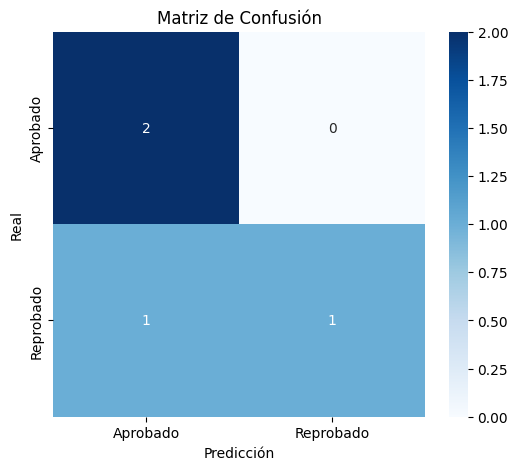

In [ ]:
import seaborn as sns
# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Aprobado", "Reprobado"], yticklabels=["Aprobado", "Reprobado"])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

## 10.5 Ejercicio de Clasificación de problemas cardiacos con KNN

Volveremos a hacer el ejercicio, con el conjunto de datos de pacientes para predecir la presencia de problemas cardíacos donde intentamos predecir la presencia de problemas cardíacos utilizando las características de edad y colesterol. El objetivo es aplicar dos modelos de clasificación supervisada, con Knn , para resolver este problema y realizar una evaluación adecuada de los modelos.

En el proceso, vamos a seguir los siguientes pasos para cada modelo:

•	Exploración y Análisis Exploratorio de Datos (EDA):

Inspeccionar los datos para comprender su estructura, identificar valores faltantes y realizar un análisis preliminar.

•	Imputación de Valores

Faltantes: Dado que el conjunto de datos contiene valores nulos en las columnas de características, necesitamos imputarlos.


•	Preprocesamiento:

Incluye la numerización de variables categóricas (si las hay), la división de los datos en conjuntos de entrenamiento y prueba, y la normalización si es necesario.


•	Entrenamiento del Modelo:

Usar knn para entrenar el modelo de clasificación.


•	Evaluación:

Evaluar el rendimiento del modelo utilizando métricas como la precisión (accuracy), la matriz de confusión, la curva ROC y el AUC.

•	Persistencia del Modelo:

Guardar el modelo entrenado para uso futuro.


•	Predicciones con Nuevos Datos: Realizar predicciones con datos no vistos previamente.


In [ ]:
import pandas as pd

# Cargar el conjunto de datos
url = "https://raw.githubusercontent.com/adiacla/bigdata/refs/heads/master/pacientes.csv"
df = pd.read_csv(url)

# Mostrar las primeras filas para inspeccionar los datos
print(df.head())
print(df.info())


   edad  colesterol  problema_cardiaco
0  63.0       233.0                  1
1   NaN       250.0                  0
2  37.0       250.0                  0
3  41.0       204.0                  0
4  56.0       236.0                  1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   edad               300 non-null    float64
 1   colesterol         300 non-null    float64
 2   problema_cardiaco  302 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 7.2 KB
None


### 2. Manejo de Datos Faltantes
El conjunto de datos contiene valores nulos, lo que requiere imputación para evitar errores durante el entrenamiento del modelo. Usaremos la mediana para imputar los valores faltantes, ya que es menos sensible a los valores atípicos.


In [ ]:
# Imputar los valores nulos con la mediana
df['edad'] = df['edad'].fillna(df['edad'].median())
df['colesterol'] = df['colesterol'].fillna(df['colesterol'].median())

# Verificar que no haya valores nulos
print(df.isnull().sum())


edad                 0
colesterol           0
problema_cardiaco    0
dtype: int64


### 3. Preprocesamiento de Datos
Dado que las características son numéricas, solo necesitamos normalizarlas para que todas tengan la misma escala y así mejorar el rendimiento del modelo KNN.


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,302.0,54.307947,9.060586,29.0,47.25,55.0,61.0,77.0
colesterol,302.0,247.248344,51.684575,126.0,212.00,242.5,275.0,564.0
problema_cardiaco,302.0,0.493377,0.500786,0.0,0.00,0.0,1.0,1.0


In [ ]:
df

,edad,colesterol,problema_cardiaco
0,63.0,233.0,1
1,55.0,250.0,0
2,37.0,250.0,0
3,41.0,204.0,0
4,56.0,236.0,1
...,...,...,...
297,63.0,187.0,0
298,63.0,197.0,0
299,59.0,176.0,0
300,57.0,241.0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalizar las características numéricas
scaler = MinMaxScaler()
df[['edad', 'colesterol']] = scaler.fit_transform(df[['edad', 'colesterol']])

# Ver los primeros datos después de la normalización
df


,edad,colesterol,problema_cardiaco
0,0.708333,0.244292,1
1,0.541667,0.283105,0
2,0.166667,0.283105,0
3,0.250000,0.178082,0
4,0.562500,0.251142,1
...,...,...,...
297,0.708333,0.139269,0
298,0.708333,0.162100,0
299,0.625000,0.114155,0
300,0.583333,0.262557,1


### 4. División de Datos en Entrenamiento y Prueba
Dividimos el conjunto de datos en un conjunto de entrenamiento (80%) y uno de prueba (20%). Aplicamos stratify para asegurar que ambas particiones mantengan la misma proporción de clases.


In [ ]:
from sklearn.model_selection import train_test_split

# Definir las características (X) y la etiqueta (y)
X = df[['edad', 'colesterol']]
y = df['problema_cardiaco']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


Tamaño del conjunto de entrenamiento: (241, 2)
Tamaño del conjunto de prueba: (61, 2)


### 5. Entrenamiento del Modelo KNN y Ajuste del Valor de k
Usamos el algoritmo K-Nearest Neighbors (KNN), y como parte del proceso, necesitamos elegir el mejor valor de k. Para ello, utilizaremos validación cruzada para encontrar el k óptimo.


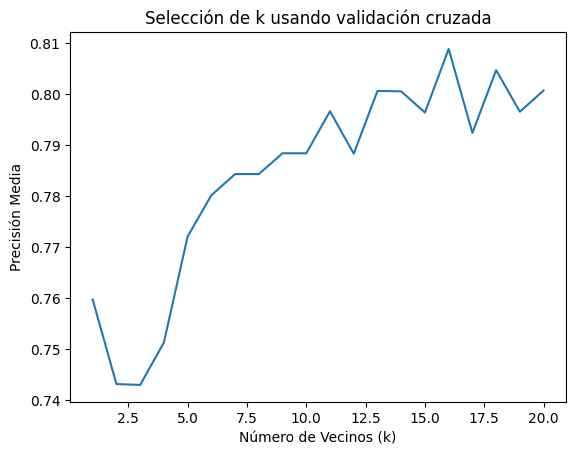

El mejor valor de k es: 16


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Probar diferentes valores de k para encontrar el mejor
k_values = range(1, 21)  # Probar k desde 1 hasta 20
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))

# Graficar el rendimiento en función de k
import matplotlib.pyplot as plt
plt.plot(k_values, cv_scores)
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Precisión Media')
plt.title('Selección de k usando validación cruzada')
plt.show()

# Seleccionar el valor de k con mejor rendimiento
best_k = k_values[np.argmax(cv_scores)]
print(f"El mejor valor de k es: {best_k}")


### 6. Evaluación del Modelo KNN
Una vez que seleccionamos el mejor valor de k, entrenamos el modelo final y evaluamos su rendimiento utilizando métricas como accuracy, matriz de confusión, curva ROC y AUC.


In [ ]:
best_k

16

In [ ]:
# Entrenar el modelo con el mejor k
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_knn = knn_model.predict(X_test)

y_pred_knn

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1])

Precisión KNN: 0.7704918032786885
Matriz de Confusión KNN:
 [[25  6]
 [ 8 22]]
AUC KNN: 0.8758064516129033


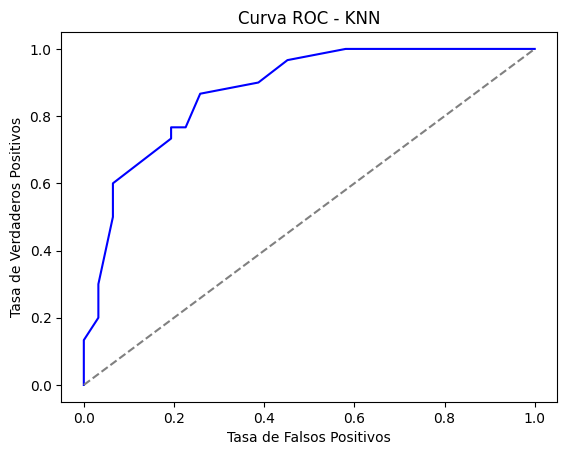

In [ ]:
# Evaluar el modelo
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# Calcular precisión
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Precisión KNN:", accuracy_knn)

# Calcular la matriz de confusión
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Matriz de Confusión KNN:\n", conf_matrix_knn)

# Calcular el AUC
roc_auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
print("AUC KNN:", roc_auc_knn)

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Curva ROC - KNN')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.show()


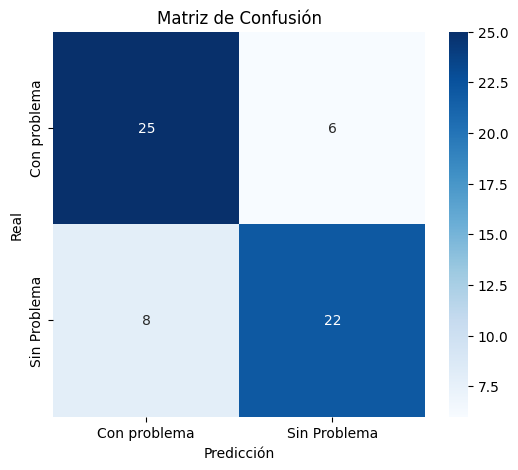

In [ ]:
import seaborn as sns
# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["Con problema", "Sin Problema"], yticklabels=["Con problema", "Sin Problema"])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

### 7. Persistencia del Modelo
Guardamos el modelo entrenado para su uso futuro, lo que permite cargarlo y hacer predicciones sin tener que entrenarlo nuevamente.


In [ ]:
import joblib

# Guardar el modelo entrenado
joblib.dump(knn_model, 'modelo_knn.bin')


['modelo_knn.bin']

In [ ]:
joblib.dump(scaler,"esclador.bin")

['esclador.bin']

### 8. Predicciones con Nuevos Datos
Finalmente, realizamos predicciones con datos no vistos previamente. Supongamos que tenemos un nuevo paciente con edad 55 y colesterol 230.


In [ ]:
# Nuevo paciente (edad, colesterol)
new_data = pd.DataFrame([[60, 250]],columns=['edad', 'colesterol'])

# Normalizar el nuevo dato
new_data_scaled = pd.DataFrame(scaler.transform(new_data),columns=['edad', 'colesterol'])

# Realizar predicción
prediction = knn_model.predict(new_data_scaled)
print(f"Predicción para el nuevo paciente: {'Problema cardíaco' if prediction[0] == 1 else 'Sin problema cardíaco'}")


Predicción para el nuevo paciente: Problema cardíaco
